## Multivariate Linear Regression 

### Data load and EDA

In [459]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [460]:
df=pd.read_csv("LifeExpectancyData.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [461]:
#make country column as the Index of the df
df.set_index("Country",inplace= True)
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [462]:
df.shape

(2938, 21)

In [463]:
df['Year'].unique

<bound method Series.unique of Country
Afghanistan    2015
Afghanistan    2014
Afghanistan    2013
Afghanistan    2012
Afghanistan    2011
               ... 
Zimbabwe       2004
Zimbabwe       2003
Zimbabwe       2002
Zimbabwe       2001
Zimbabwe       2000
Name: Year, Length: 2938, dtype: int64>

In [464]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [465]:
#drop columns 
useless_col = ['percentage expenditure','Hepatitis B','Status',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources']
df.drop(useless_col,axis=1,inplace=True)


In [466]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,GDP,Schooling
Country,,,,,,,
Afghanistan,2015,65.0,263.0,62,0.01,584.259210,10.1
Afghanistan,2014,59.9,271.0,64,0.01,612.696514,10.0
Afghanistan,2013,59.9,268.0,66,0.01,631.744976,9.9
Afghanistan,2012,59.5,272.0,69,0.01,669.959000,9.8
Afghanistan,2011,59.2,275.0,71,0.01,63.537231,9.5


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2938 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              2938 non-null   int64  
 1   Life expectancy   2928 non-null   float64
 2   Adult Mortality   2928 non-null   float64
 3   infant deaths     2938 non-null   int64  
 4   Alcohol           2744 non-null   float64
 5   GDP               2490 non-null   float64
 6   Schooling         2775 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 183.6+ KB


In [468]:
# find all the null values in df
df.isnull().sum() 

Year                  0
Life expectancy      10
Adult Mortality      10
infant deaths         0
Alcohol             194
GDP                 448
Schooling           163
dtype: int64

In [469]:
df.Alcohol.value_counts() 

0.01     288
0.03      15
0.04      13
0.09      12
0.02      12
        ... 
8.98       1
5.86       1
9.03       1
6.87       1
13.28      1
Name: Alcohol, Length: 1076, dtype: int64

In [470]:
#replace alcohol null values with the most recurrent number
df.Alcohol.fillna(0.01,inplace=True)

In [471]:
#replace GDP null values with the median
b=df.GDP.median()
df.GDP.fillna(b,inplace=True)

In [472]:
#the rest drop the null values
df.dropna(inplace=True)

In [473]:
df.isnull().sum() 

Year                0
Life expectancy     0
Adult Mortality     0
infant deaths       0
Alcohol             0
GDP                 0
Schooling           0
dtype: int64

In [474]:
#correlation scores
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,GDP,Schooling
Year,1.000000,0.171042,-0.075688,-0.037298,-0.152626,0.096364,0.213265
Life expectancy,0.171042,1.000000,-0.684585,-0.179548,0.348985,0.447565,0.751975
Adult Mortality,-0.075688,-0.684585,1.000000,0.063906,-0.163748,-0.288519,-0.454612
infant deaths,-0.037298,-0.179548,0.063906,1.000000,-0.094712,-0.101356,-0.195202
Alcohol,-0.152626,0.348985,-0.163748,-0.094712,1.000000,0.326498,0.499465
GDP,0.096364,0.447565,-0.288519,-0.101356,0.326498,1.000000,0.437770
Schooling,0.213265,0.751975,-0.454612,-0.195202,0.499465,0.437770,1.000000


<AxesSubplot:>

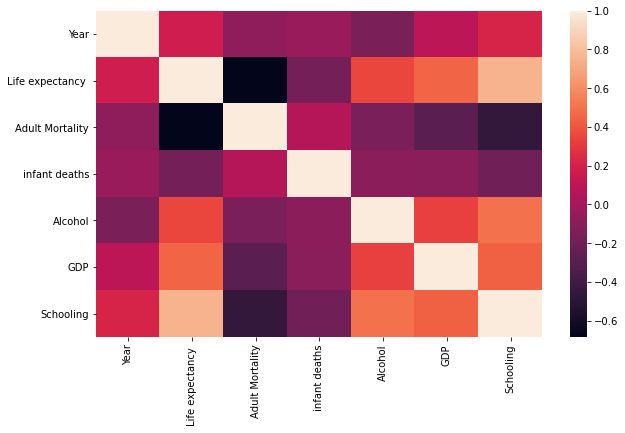

In [475]:
#correlation depicted in heatmap
sns.heatmap(df.corr())

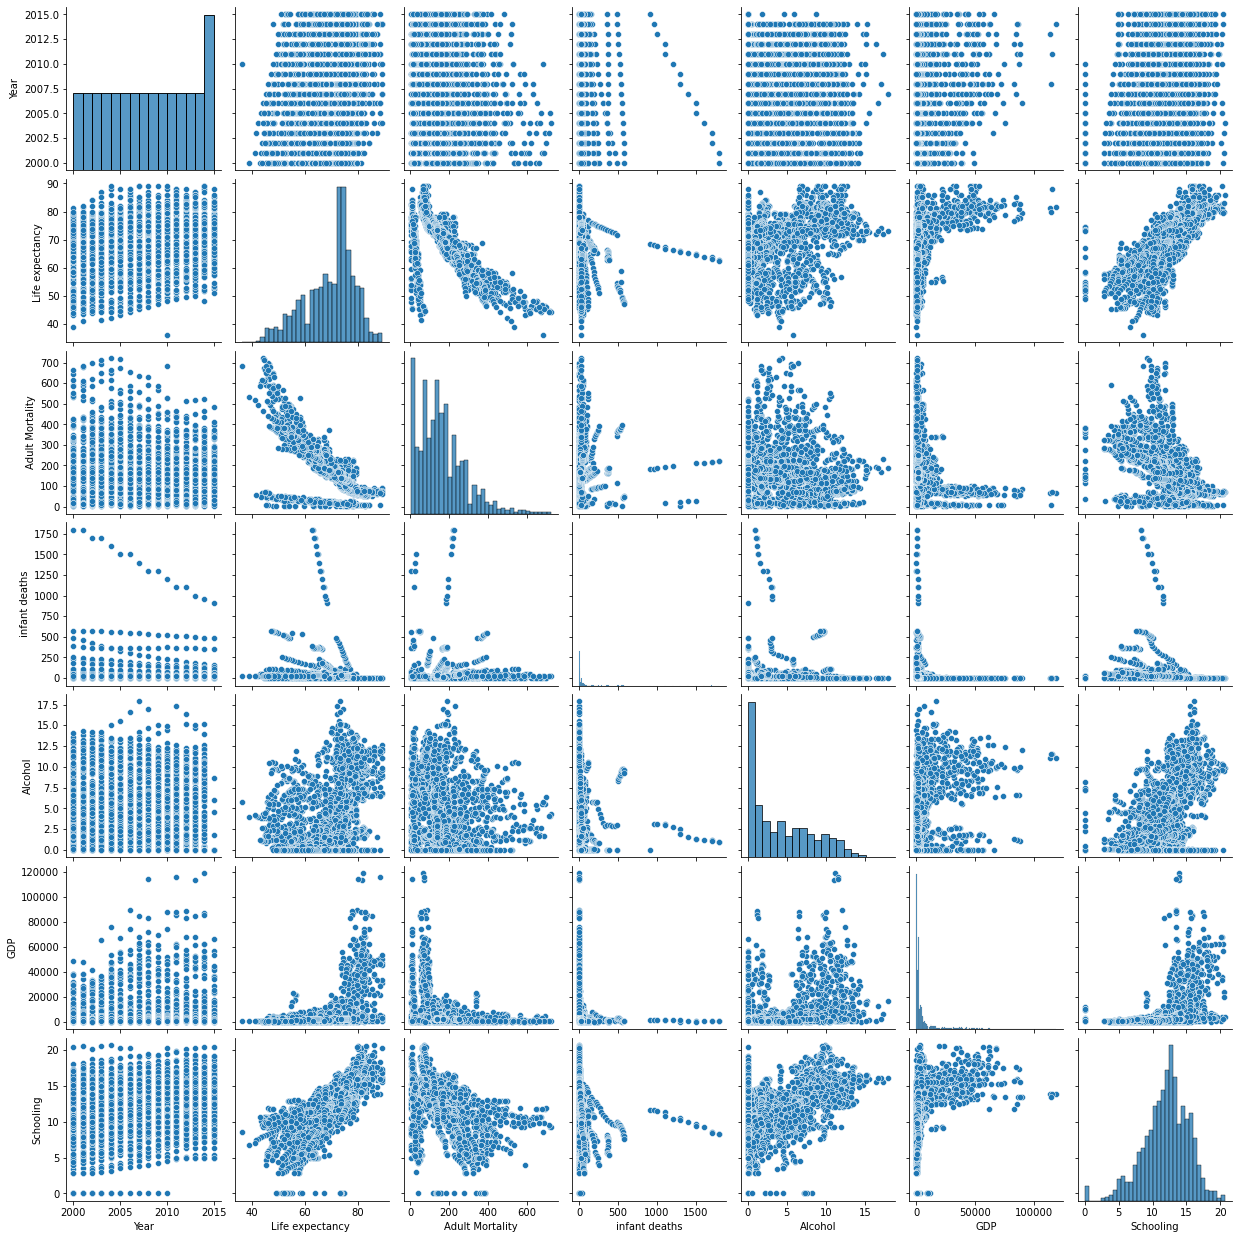

In [476]:
#a scatterplot overview of the correlations between features
sns.pairplot(df)

### Linear Regression 


Linear regression predicts the dependent value (y) according to the independent variable (x). The output here is the dependent value, and the input is the independent value.

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

### Cost Function


The loss over **m** examples:
Mean Squared Error:


$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this error  value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$





### The gradient descent algorithm:


do it for all the theta values(no of theta values = no of features + 1).

![Loss vs Param](GD.png)




In [477]:
X = df.values[:, 2:7]  #  input values from last 5 columns
y = df.values[:, 1]  # get output values 2nd coulmn(life_exp)
m = len(y) # Number of training examples

print('Total no of training examples (m) = %s \n' %(m))

# Show only first 5 records
for i in range(5):
    print('x =', X[i, ], ', y =', y[i])

Total no of training examples (m) = 2768 

x = [2.6300000e+02 6.2000000e+01 1.0000000e-02 5.8425921e+02 1.0100000e+01] , y = 65.0
x = [2.71000000e+02 6.40000000e+01 1.00000000e-02 6.12696514e+02
 1.00000000e+01] , y = 59.9
x = [2.68000000e+02 6.60000000e+01 1.00000000e-02 6.31744976e+02
 9.90000000e+00] , y = 59.9
x = [2.72000e+02 6.90000e+01 1.00000e-02 6.69959e+02 9.80000e+00] , y = 59.5
x = [2.7500000e+02 7.1000000e+01 1.0000000e-02 6.3537231e+01 9.5000000e+00] , y = 59.2


### Then we Normalize the features because they all are not in the same range of measurement:

Feature Scaling: In feature scaling we divide the input value by range(max - min) of input variable. By this technique we get new range of just 1.

Mean Normalization: In mean normalization we subtract the average value from the input variable and then divide it by range(max - min) or by standard deviation of input variable.

In [478]:
def feature_normalize(X):
  """
    Normalizes the features(input variables) in X.

    Parameters
    ----------
    X : n dimensional array (matrix), shape (n_samples, n_features)
        Features(input varibale) to be normalized.

    Returns
    -------
    X_norm : n dimensional array (matrix), shape (n_samples, n_features)
        A normalized version of X.
    mu : n dimensional array (matrix), shape (n_features,)
        The mean value.
    sigma : n dimensional array (matrix), shape (n_features,)
        The standard deviation.
  """
  # mean of column, hence axis = 0
  mu = np.mean(X, axis = 0)  
  # Notice the parameter ddof (Delta Degrees of Freedom)  value is 1
  sigma = np.std(X, axis= 0, ddof = 1)  # Standard deviation (can also use range)
  X_norm = (X - mu)/sigma
  return X_norm, mu, sigma

In [479]:
X, mu, sigma = feature_normalize(X)

print('mu= ', mu)
print('sigma= ', sigma)
print('X_norm= ', X[:5])

mu=  [1.63041546e+02 2.93674133e+01 4.22054552e+00 6.91024864e+03
 1.19996387e+01]
sigma=  [1.22954439e+02 1.20255278e+02 4.03172439e+00 1.36423268e+04
 3.34644030e+00]
X_norm=  [[ 0.81297149  0.27136095 -1.04435351 -0.46370311 -0.56765953]
 [ 0.87803624  0.28799224 -1.04435351 -0.46161862 -0.59754203]
 [ 0.85363696  0.30462353 -1.04435351 -0.46022235 -0.62742453]
 [ 0.88616934  0.32957046 -1.04435351 -0.45742121 -0.65730703]
 [ 0.91056862  0.34620174 -1.04435351 -0.5018727  -0.74695453]]


In [480]:
#New mean or avearage value of normalized X feature is 0
mu_testing = np.mean(X, axis = 0) # mean
mu_testing

array([ 7.18757103e-17, -1.54019379e-17, -7.18757103e-17,  7.44426999e-17,
        9.24116275e-17])

In [481]:
#New range or standard deviation of normalized X feature is 1
sigma_testing = np.std(X, axis = 0, ddof = 1) # mean
sigma_testing

array([1., 1., 1., 1., 1.])

In [482]:
# Lets use hstack() function from numpy to add column of ones to X feature 
# This will be our final X matrix (feature matrix)
X = np.hstack((np.ones((m,1)), X))
X[:5]

array([[ 1.        ,  0.81297149,  0.27136095, -1.04435351, -0.46370311,
        -0.56765953],
       [ 1.        ,  0.87803624,  0.28799224, -1.04435351, -0.46161862,
        -0.59754203],
       [ 1.        ,  0.85363696,  0.30462353, -1.04435351, -0.46022235,
        -0.62742453],
       [ 1.        ,  0.88616934,  0.32957046, -1.04435351, -0.45742121,
        -0.65730703],
       [ 1.        ,  0.91056862,  0.34620174, -1.04435351, -0.5018727 ,
        -0.74695453]])

In [483]:
from sklearn.model_selection import train_test_split
X, x_test, y, y_test = train_test_split(X,y,test_size =0.2)

In [491]:
X[1]

array([ 1.        , -0.56152138, -0.24420893,  0.0792352 , -0.1685032 ,
        0.38858045])

In [492]:
x_test[1]

array([ 1.        , -0.23619762, -0.24420893, -1.04435351, -0.30208008,
       -3.58579196])

In [484]:
def compute_cost(X, y, theta):
  """
  Compute the cost of a particular choice of theta for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  #J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  J = 1/(2 * m) * errors.T.dot(errors)

  return J

In [485]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent the feature ndarray. Dimension(m x n)
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value. 

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

  return theta, cost_history

In [486]:
# We need theta parameter for every input variable. since we have 6 input variable including X_0 (column of ones)
theta = np.zeros(6)
iterations = 400;
alpha = 0.15;

In [487]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[:5])
print('Last 5 values from cost_history =', cost_history[-5 :])

Final value of theta = [69.39384415 -4.04077333 -0.32735783 -0.07708105  0.92034632  4.80265072]
First 5 values from cost_history = [1517.97994638 1173.8630599   909.2153592   705.26685359  547.86126136]
Last 5 values from cost_history = [9.52081929 9.52081929 9.52081929 9.52081929 9.52081929]


Text(0.5, 1.0, 'Convergence of gradient descent')

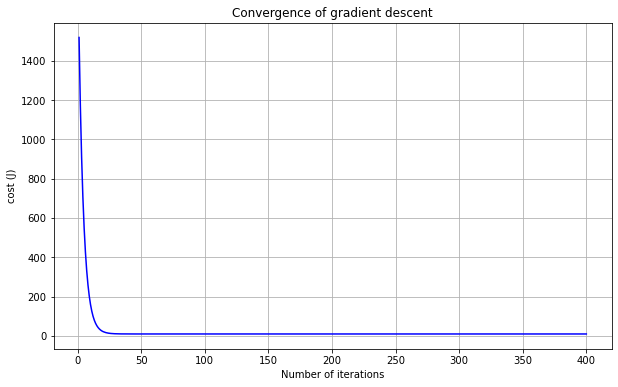

In [488]:
import matplotlib.pyplot as plt
plt.plot(range(1, iterations +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")

### Effect Of Learning Rate On Convergence

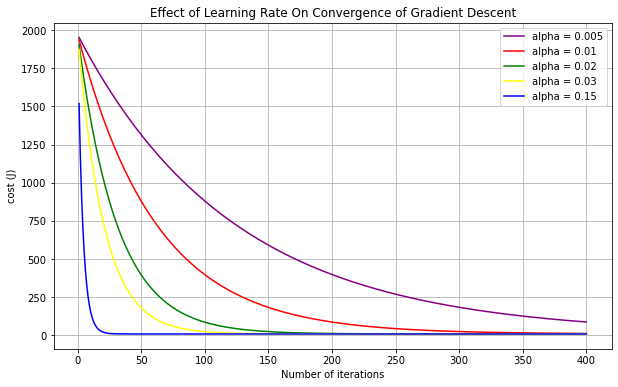

In [489]:
iterations = 400;
theta = np.zeros(6)

alpha = 0.005;
theta_1, cost_history_1 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.01;
theta_2, cost_history_2 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.02;
theta_3, cost_history_3 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.03;
theta_4, cost_history_4 = gradient_descent(X, y, theta, alpha, iterations)

alpha = 0.15;
theta_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'alpha = 0.005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.01')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.02')
plt.plot(range(1, iterations +1), cost_history_4, color ='yellow', label = 'alpha = 0.03')
plt.plot(range(1, iterations +1), cost_history_5, color ='blue', label = 'alpha = 0.15')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()


Text(0.5, 1.0, 'Effect of Large Learning Rate On Convergence of Gradient Descent')

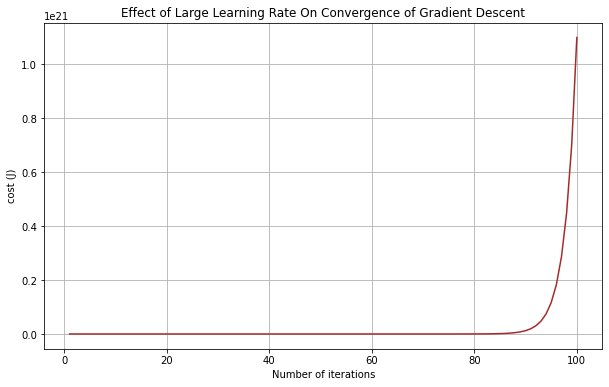

In [490]:
iterations = 100;
theta = np.zeros(6)

alpha = 1.32;
theta_6, cost_history_6 = gradient_descent(X, y, theta, alpha, iterations)

plt.plot(range(1, iterations +1), cost_history_6, color ='brown')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Large Learning Rate On Convergence of Gradient Descent")

In [520]:


for i in range(50):
    hu = (np.array(x_test[i]))
    ki=hu[1:6]
    normalize_test_data = ((ki - mu) / sigma)
    normalize_test_data = np.hstack((np.ones(1), normalize_test_data))
    y_pred = normalize_test_data.dot(theta_3)
    print('Predicted age : {},real y value: {}'.format(y_pred, y_test[i]) )
    
    

Predicted age : 56.28596970945274,real y value: 51.0
Predicted age : 52.367384314708936,real y value: 73.5
Predicted age : 57.37085225097908,real y value: 73.3
Predicted age : 56.387163344839095,real y value: 54.7
Predicted age : 57.425526781138004,real y value: 75.0
Predicted age : 54.32706727316597,real y value: 55.0
Predicted age : 55.5410275650472,real y value: 62.0
Predicted age : 57.440954212044645,real y value: 69.4
Predicted age : 56.852135177228746,real y value: 67.4
Predicted age : 55.9554729869899,real y value: 64.6
Predicted age : 53.93222303251741,real y value: 51.2
Predicted age : 57.61517504865464,real y value: 72.0
Predicted age : 57.67481784825353,real y value: 58.9
Predicted age : 60.01432155792146,real y value: 81.4
Predicted age : 57.69481797996671,real y value: 69.7
Predicted age : 55.48974335554385,real y value: 62.1
Predicted age : 57.53630063134424,real y value: 73.8
Predicted age : 58.425282543093516,real y value: 75.6
Predicted age : 59.07253437260085,real y v